# Mask R-CNN for Human Pose Estimation Demo on any image

A brief introduction to using the pre-trained model for human pose estimation.

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2

import coco
import utils
import model as modellib
import visualize
from model import log

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "mylogs")

Code to avoid scoll bars in image cells

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Set path to model and images

In [3]:
# Local path to trained weights file
MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco_humanpose.h5")
# MODEL_PATH = model.find_last()[1]

# Directory of images to run detection on
IMAGE_DIR = "D:/persons"  # TODO: enter value here

In [4]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    KEYPOINT_MASK_POOL_SIZE = 7 #Superlee506 configuration

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
assert MODEL_PATH != "", "Provide path to trained weights"
print("Loading weights from ", MODEL_PATH)
model.load_weights(MODEL_PATH, by_name=True)

Instructions for updating:
Use fn_output_signature instead
Loading weights from  C:\Users\stlu1025\Documents\GitHub\Mask_RCNN_Humanpose\mask_rcnn_coco_humanpose.h5


## Inference
Run inference on image and show keypoints and instances. Run this block multiple times to test different images.

C:\Users\stlu1025\Anaconda3\envs\tf25-profiler\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


keypoint_shape: (1, 17, 3)


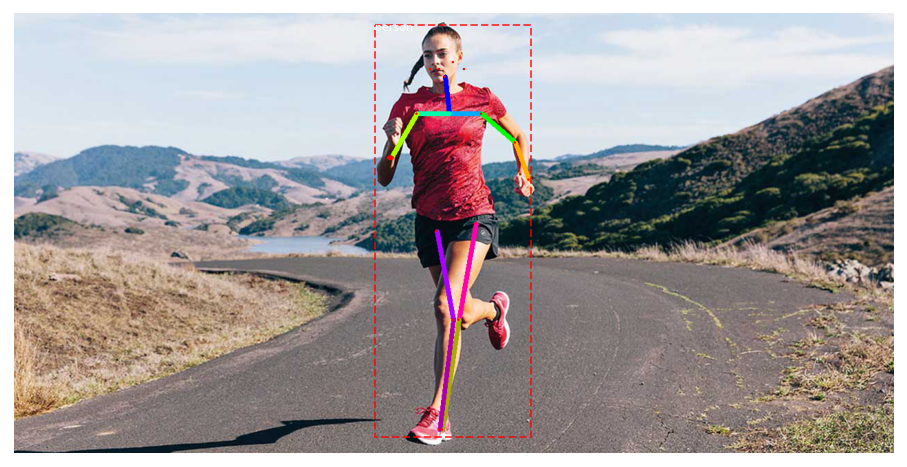

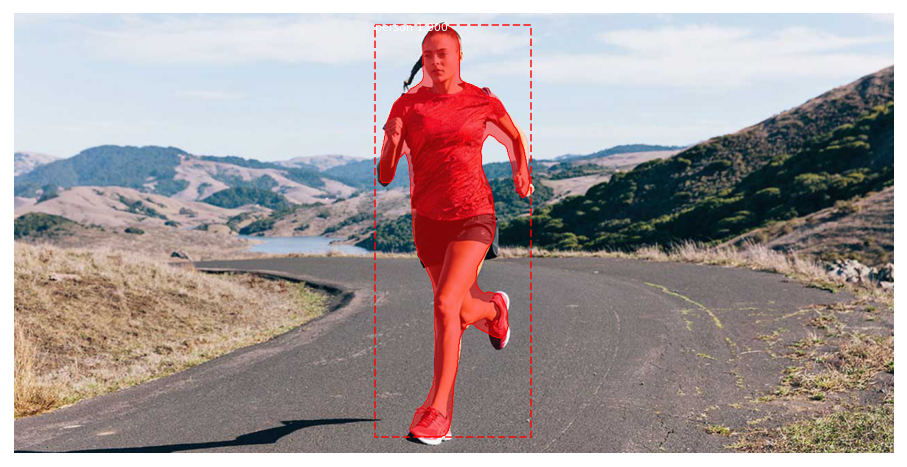

In [5]:
# Class names
#For human pose task we just use "BG" and "person"
class_names = ['BG', 'person']

# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = cv2.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

#BGR->RGB
image = image[:,:,::-1]

# Run detection
results = model.detect_keypoint([image], verbose=0)
r = results[0] # for one image

visualize.display_keypoints(image,r['rois'],r['keypoints'],r['class_ids'], class_names,skeleton = inference_config.LIMBS)
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])